In [10]:
import os, gc
import sys, pdb
import copy, time
import json, random

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path

import matplotlib
import os

import torch

from matplotlib import colors
import matplotlib.pyplot as plt
from colorama import Style, Fore
# %matplotlib inline ipnyb

from dataloader.my_loader import MyDataLoader
from dataloader.OAutoEncoder_loader import ARCDataset

from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from visualization.my_vis import ARCPlottor


from models.O_Auto_Encoder import *

for dirname, _, filenames in os.walk('/home/hyunseok/enssamble/settings'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

local_path = "/home/hyunseok/enssamble/data/kaggle/"
with open("/home/hyunseok/enssamble/settings/kaggle_data_file_name.json",'r') as file:
    path_dict = json.load(file)
    data = MyDataLoader("arcprize", path_dict, local_path) 
    data.cur_data_mode("train")

plotter = ARCPlottor()


cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])

norm = colors.Normalize(vmin=0, vmax=9)
color_list = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]


/home/hyunseok/enssamble/settings/kaggle_data_file_name.json
/home/hyunseok/enssamble/settings/kaggle_data_file_name copy.json
train_problem is loaded: /home/hyunseok/enssamble/data/kaggle/arc-agi_training_challenges.json
train_target_goal is loaded: /home/hyunseok/enssamble/data/kaggle/arc-agi_training_solutions.json
evaluation_problem is loaded: /home/hyunseok/enssamble/data/kaggle/arc-agi_evaluation_challenges.json
evaluation_target_goal is loaded: /home/hyunseok/enssamble/data/kaggle/arc-agi_evaluation_solutions.json
test_problem is loaded: /home/hyunseok/enssamble/data/kaggle/arc-agi_test_challenges.json
predicted_target_goal is loaded: /home/hyunseok/enssamble/data/kaggle/arc-agi_test_challenges.json
train data is set


In [11]:
!g++ -pthread -lpthread -O3 -std=c++17 -o ./cookedModels/SkleanTree ./models/SkleanTree.cpp
!./cookedModels/SkleanTree

^C
inputs: 1
features: 50
columns: 50
shape: 15x15
rows: 14399


In [ ]:
BASE_FOLDER = '/home/hyunseok/enssamble/data/kaggle/'
file_list = [
    f'{BASE_FOLDER}/arc-agi_training_challenges.json',
    f'{BASE_FOLDER}/arc-agi_evaluation_challenges.json',
    f'{BASE_FOLDER}/arc-agi_test_challenges.json'

]
def auto_encoder():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])

    norm = colors.Normalize(vmin=0, vmax=10)

    train_dataset = ARCDataset(file_list)
    train_dataset.set_dataset()
    train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

    Dimension = train_dataset.dim
    Keys = train_dataset.keys

    IN_DIM = 100 + 1
    OUT_DIM = 100
    LATENT_DIM = 1024
    model = LSTM(IN_DIM, OUT_DIM, LATENT_DIM).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    training = Training(model, train_loader, criterion, optimizer, device)
    training.train()

    model.load_state_dict(torch.load('model.pth'))

    sanity = Prediction(model, train_dataset, Dimension, cmap, norm, device)
    def plot_pic(x):
        plt.imshow(np.array(x), cmap=cmap, norm=norm)
        plt.show()
    for i in range(100):
        result = sanity.predict(model,[sanity.data.data[i][1],sanity.data.data[i][2]])
        print(result)
        output1 = sanity.remove_tail_zeros(sanity.data.data[i][0], torch.round(result * 9), 'out')
        plot_pic(output1)
# for i in range(len(pred.data)):
#     result = pred.predict(model,[pred.data.data[i][1],pred.data.data[i][2]])
#     output1 = pred.remove_tail_zeros(pred.data.data[i][0], torch.round(result * 9), 'out')
#     plot_pic(output1)

In [ ]:
from models.symmetry_repariring import *
from models.color_counter import *
from models.different_solvers import *
from models.via_tree import *
from cookedModels.utils import *
from visualization.my_vis import *

from checker.checker import depency_inject_funcs

data_mode = "evaluation"

In [ ]:

import json
from datetime import datetime

def make_submission_file(data, solver_name, dataloader, data_mode):
    now = datetime.now()
 

    metadata = {
        "date": now.strftime("%Y-%m-%d"),  # YYYY-MM-DD 형식
        "time": now.strftime("%H:%M:%S"),   # HH:MM:SS 형식
        "data_mode": data_mode,
        "solver_name": solver_name,
    } 
    json_file_data = {
        'metadata': metadata,
        'submission': data
    }

    # JSON 파일로 저장
    with open('./data/submissions/{}-{}-{}-{}.json'.format(metadata['date'], metadata['time'],metadata['data_mode'], metadata['solver_name'] ), 'w') as json_file:
        json.dump(json_file_data, json_file, indent=4)

In [ ]:
data_mode = "evaluation"

f1 = lambda test_input: predict_repeating(test_input)
f2 = lambda task, test_input: predict_transforms_grid_2x(task, test_input)
f3 = lambda x: predict_chess(grid_filter(x))
f4 = lambda task, test_input: predict_tiles_shape(task, test_input)
f5 = lambda task,test_input: predict_grid_transforms(task, test_input)
f6 = lambda test_input: predict_repeating_mask(test_input)

fdata1 = depency_inject_funcs( data, data_mode, f1, [(check_repeating, [True], {})])
fdata2 = depency_inject_funcs( data, data_mode, f2, [(check_grid, [], {}),(check_sub_grid_2x,[],{})])
fdata3 = depency_inject_funcs( data, data_mode, f3, [(check_grid, [], {}),(check_chess,[ False, True],{})])
fdata4 = depency_inject_funcs( data, data_mode, f4, [(check_tiles_shape, [True], {})],[],{})
fdata5 = depency_inject_funcs( data, data_mode, f5, [(check_grid, [], {}), (check_grid_transforms,[],{})])
fdata6 = depency_inject_funcs( data, data_mode, f6, [(check_sub_mask, [], {})])



evaluation data is set


KeyboardInterrupt: 

In [ ]:
from cookedModels.colors_counter import *
from cookedModels.symmetry_repairing import *
from cookedModels.sklearn_tree import * 

store1 = {}
store2 = {}
store3 = {}
for task_id in data.cur_problem:
    task = data.cur_problem[task_id]
    for i in range(len(task['test'])):
        test_input = np.array(task['test'][i]['input'])
        prn = []
        ganswer = []
        cooked_symmetry_repairing(store1, task, task_id, i, ganswer, prn, pic_mode=True)
        prn = []
        ganswer = []
        cooked_color_counter(store2, task, task_id, i, ganswer, prn, pic_mode=True)
        prn = []
        ganswer = []
        cooked_sklearn_tree(store3, task, test_input, task_id, prn, pic_mode=True)


In [ ]:
from cookedModels.arc_dsl_solvers import sub_arc_dsl, cooked_arc_dsl_solvers
from dataloader.my_loader import *
from models.arcdsls import solvers

store6 = {}
cooked_arc_dsl_solvers(store6, data, data_mode)

In [ ]:


make_submission_file(fdata1, "predict_repeating", data, data_mode)
make_submission_file(fdata2, "predict_transforms_grid_2x", data, data_mode)
make_submission_file(fdata3, "predict_chess", data, data_mode)
make_submission_file(fdata4, "predict_tiles_shape", data, data_mode)
make_submission_file(fdata5, "predict_grid_transforms", data, data_mode)
make_submission_file(fdata6, "predict_repeating_mask", data, data_mode)

make_submission_file(store1, "symmetry_repairing", data, data_mode)
make_submission_file(store2, "colors_counter", data, data_mode)
make_submission_file(store3, "sklearn_tree", data, data_mode)
make_submission_file(store6, "arc_dsl_solvers", data, data_mode)

In [ ]:
def sub_icecube(store):
    with open('./data/submissions/evaluation_sub_icecube.json', 'r') as file:
        icecube = json.load(file)
    store = {}
    for key in icecube:
        print(key,len(icecube[key]))
        for i in range(len(icecube[key])):
            store[key]=[icecube[key][i]['attempt_1'], icecube[key][i]['attempt_2']]
    return store
store7 = {}
store7 = sub_icecube(store7)
make_submission_file(store7, "ice_cuber", data, data_mode)

In [12]:
import json
import os


def compare_2d_lists(list1, list2):
    return np.array_equal(np.array(list1), np.array(list2))

def check_submissions():
    mem = []
    suc_mem = []
    fail_mem = []
    for dirname, _, filenames in os.walk('/home/hyunseok/enssamble/data/submissions'):
        for filename in filenames:
            suc_dict = {'submission': {}}
            fail_dict = {'submission': {}}

            path = os.path.join(dirname, filename)
            print(path)
            with open(path,'r') as file:
                guess = json.load(file)
                mem.append(guess)

            data_mode='evaluation'
            data.cur_data_mode(data_mode)
            data.cur_target_goal
            right = 0
            wrong = 0
            if len(guess['submission'].keys()) == 0:
                continue
            for key in guess['submission']:
                
                # plotter.check_type([data.cur_target_goal[key][0], guess['submission'][key][0]],key)
                if(compare_2d_lists(data.cur_target_goal[key][0], guess['submission'][key][0])):
                    right += 1
                    suc_dict['submission'][key] = guess['submission'][key]
                    # print(key, "right")
                else:
                    wrong += 1
                    fail_dict['submission'][key] = guess['submission'][key]
                    # print(key, "wrong")
            suc_dict['metadata'] = guess['metadata']
            fail_dict['metadata'] = guess['metadata']
             
            suc_mem.append(suc_dict)
            fail_mem.append(fail_dict)
            print(right, wrong, len(data.cur_target_goal[key]), len(guess['submission'][key]))
    return mem, suc_mem, fail_mem


venn, suc_venn, fail_venn = check_submissions()

/home/hyunseok/enssamble/data/submissions/2024-10-31-09:46:00-evaluation-arc_dsl_solvers.json
evaluation data is set
15 0 1 2
/home/hyunseok/enssamble/data/submissions/2024-10-31-10:22:09-evaluation-ice_cuber.json
evaluation data is set
132 268 1 2
/home/hyunseok/enssamble/data/submissions/2024-10-31-09:46:00-evaluation-colors_counter.json
evaluation data is set
1 1 1 2
/home/hyunseok/enssamble/data/submissions/2024-10-31-09:46:00-evaluation-predict_transforms_grid_2x.json
evaluation data is set
/home/hyunseok/enssamble/data/submissions/2024-10-31-09:46:00-evaluation-predict_repeating.json
evaluation data is set
6 1 1 4
/home/hyunseok/enssamble/data/submissions/2024-10-31-09:46:00-evaluation-sklearn_tree.json
evaluation data is set
11 7 1 3
/home/hyunseok/enssamble/data/submissions/2024-10-31-09:46:00-evaluation-symmetry_repairing.json
evaluation data is set
10 4 1 2
/home/hyunseok/enssamble/data/submissions/2024-10-31-09:46:00-evaluation-predict_grid_transforms.json
evaluation data is

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

def visualize_set_overlap(dicts):
    # 딕셔너리의 키들을 집합으로 변환
    key_to_extract = "solver_name"
    solvers_name = [ d['solver_name'] for d in dicts] 
    sets = [set(d.keys()) for d in dicts]
    # sets.remove(key_to_extract)
    
    # 두 개의 딕셔너리 비교
    if len(sets) == 2:
        plt.figure(figsize=(8, 8))
        venn = venn2(subsets=sets, set_labels=(solvers_name[0], solvers_name[1]))
        
        # 중복된 키 개수 출력
        print(f"Unique keys in Dict1: {len(sets[0] - sets[1])}")
        print(f"Unique keys in Dict2: {len(sets[1] - sets[0])}")
        print(f"Common keys: {len(sets[0].intersection(sets[1]))}")
        
    # 세 개의 딕셔너리 비교
    elif len(sets) == 3:
        plt.figure(figsize=(8, 8))
        venn = venn3(subsets=sets, set_labels=(solvers_name[0], solvers_name[1], solvers_name[2]))
        
        # 중복된 키 개수 출력
        print(f"Unique keys in Dict1: {len(sets[0] - sets[1] - sets[2])}")
        print(f"Total keys in Dict1: { sets[0] }")
        print(f"Unique keys in Dict2: {len(sets[1] - sets[0] - sets[2])}")
        print(f"Total keys in Dict2: { sets[1] }")
        print(f"Unique keys in Dict3: {len(sets[2] - sets[0] - sets[1])}")
        print(f"Total keys in Dict3: { sets[2] }")

 
        print(f"Common keys among all: {len(sets[0].intersection(sets[1], sets[2]))}")
    
    else:
        print("Error: Please provide 2 or 3 dictionaries only.")
        return
    
    # Venn 다이어그램 출력
    plt.title("Dictionary Key Overlap")
    plt.show()

# 테스트용 딕셔너리
dict1 = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
dict2 = {'b': 2, 'c': 3, 'e': 5, 'f': 6}
dict3 = {'a': 1, 'c': 3, 'g': 7, 'h': 8}

# 시각화 함수 호출


In [ ]:
def find_shared_array_properties(dict1, dict2):
    """
    두 딕셔너리에서 같은 배열을 값으로 가지고 있는 속성의 키 목록을 반환.
    같은 배열이란, 같은 값을 가진 배열이며, 메모리 주소가 다를 수도 있음.
    """
    shared_keys = []

    # 두 딕셔너리의 모든 키에 대해 비교 수행
    for key in dict1:
        if key in dict2:
            # 두 값이 같은 배열인지 비교 (값이 같고, 배열일 경우)
            if isinstance(dict1[key], (list, tuple)) and dict1[key] == dict2[key]:
                shared_keys.append(key)
    
    return shared_keys


56개의 조합이 있습니다:
Unique keys in Dict1: 4
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 121
Total keys in Dict2: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', 

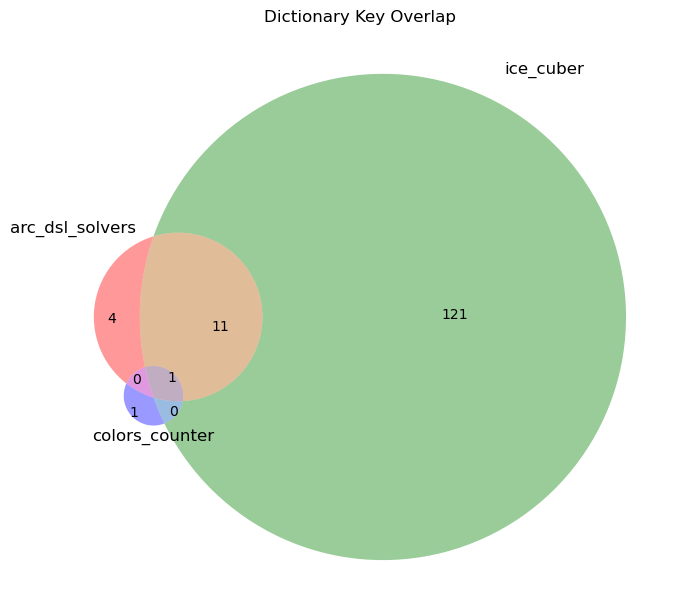

Unique keys in Dict1: 4
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 119
Total keys in Dict2: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '35

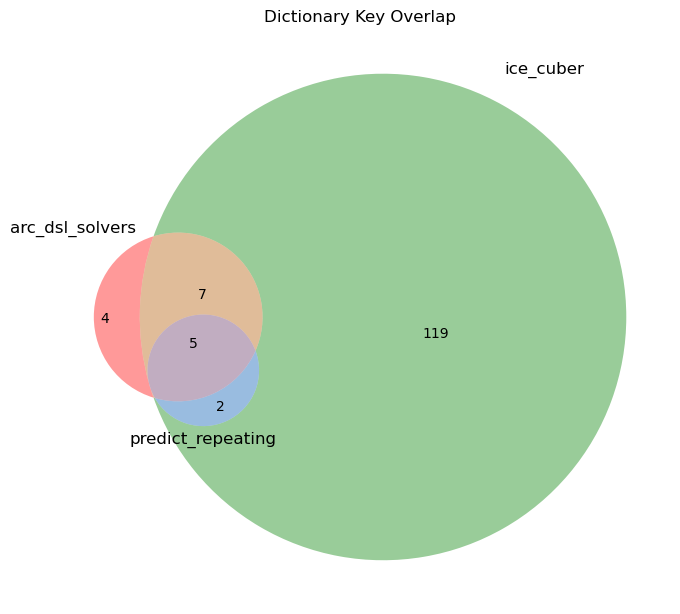

Unique keys in Dict1: 3
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 115
Total keys in Dict2: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '35

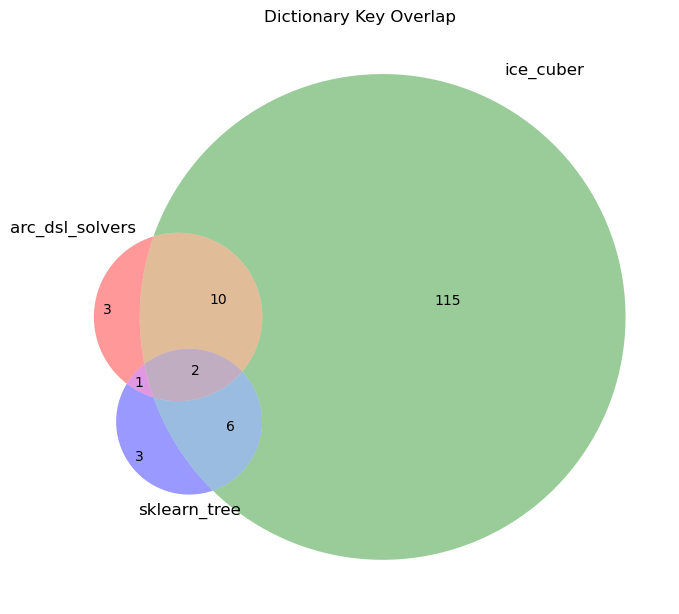

Unique keys in Dict1: 4
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 115
Total keys in Dict2: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '35

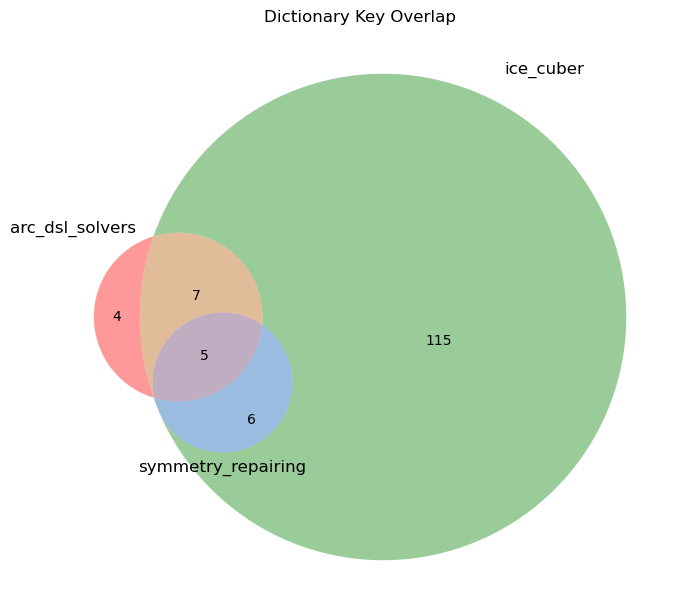

Unique keys in Dict1: 4
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 119
Total keys in Dict2: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '35

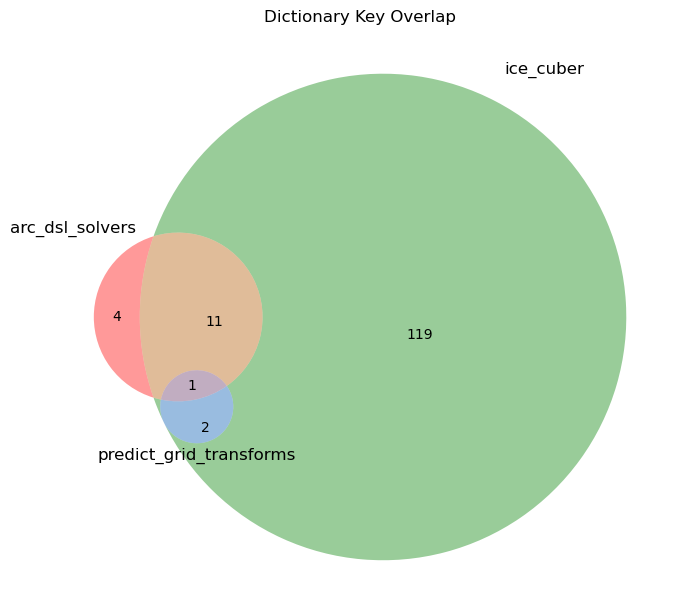

Unique keys in Dict1: 4
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 119
Total keys in Dict2: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '35

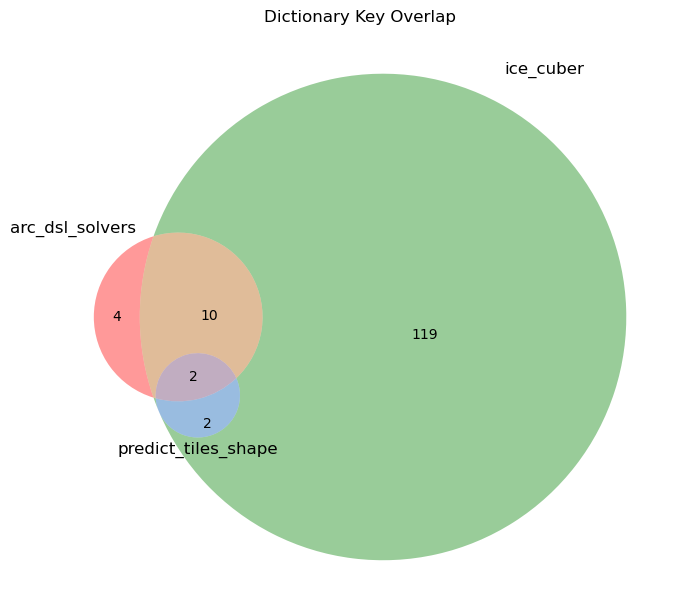

Unique keys in Dict1: 11
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 1
Total keys in Dict2: {'solver_name', '332efdb3'}
Unique keys in Dict3: 2
Total keys in Dict3: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Common keys among all: 1


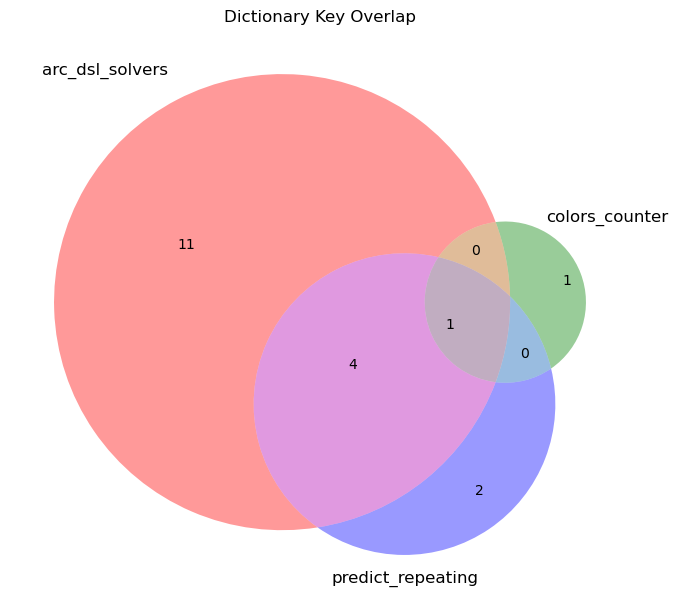

Unique keys in Dict1: 13
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 1
Total keys in Dict2: {'solver_name', '332efdb3'}
Unique keys in Dict3: 9
Total keys in Dict3: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Common keys among all: 1


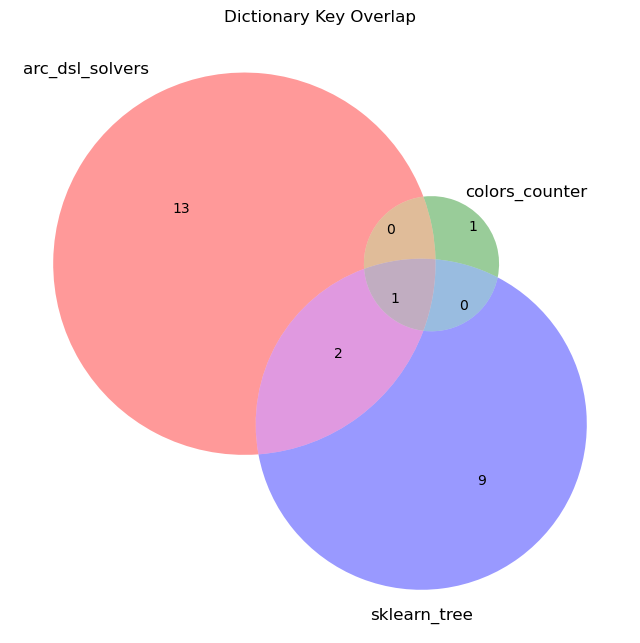

Unique keys in Dict1: 11
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 1
Total keys in Dict2: {'solver_name', '332efdb3'}
Unique keys in Dict3: 6
Total keys in Dict3: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Common keys among all: 1


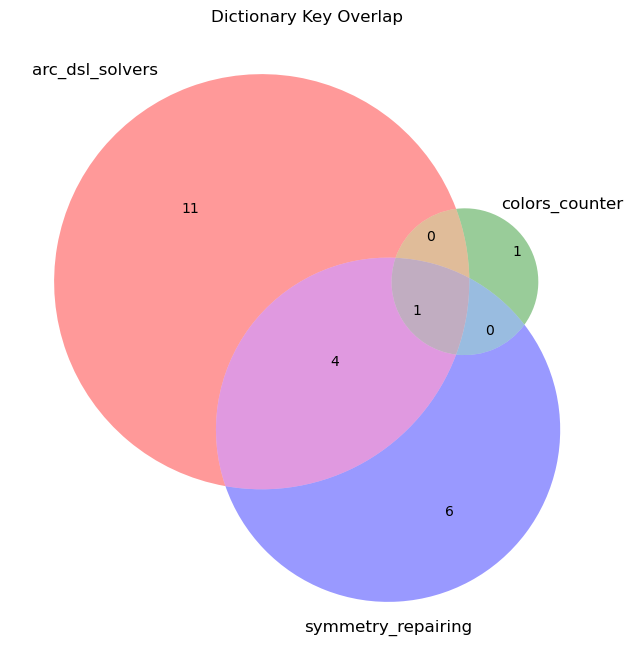

Unique keys in Dict1: 15
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 1
Total keys in Dict2: {'solver_name', '332efdb3'}
Unique keys in Dict3: 2
Total keys in Dict3: {'solver_name', '68b67ca3', '7039b2d7'}
Common keys among all: 1


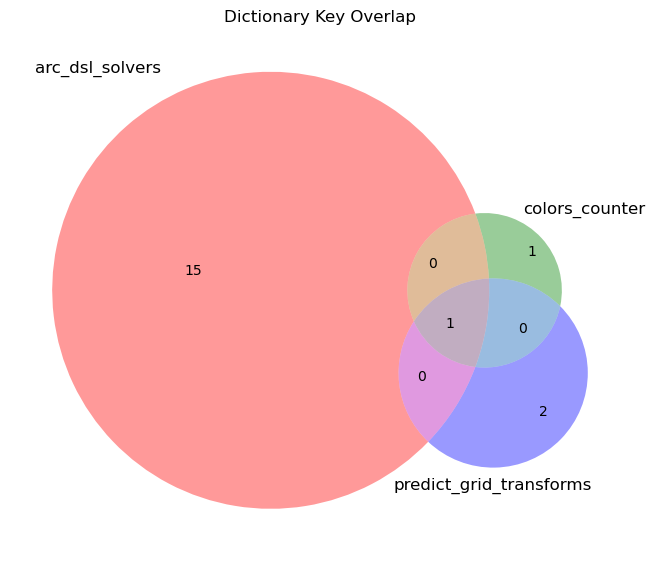

Unique keys in Dict1: 14
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 1
Total keys in Dict2: {'solver_name', '332efdb3'}
Unique keys in Dict3: 2
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 1


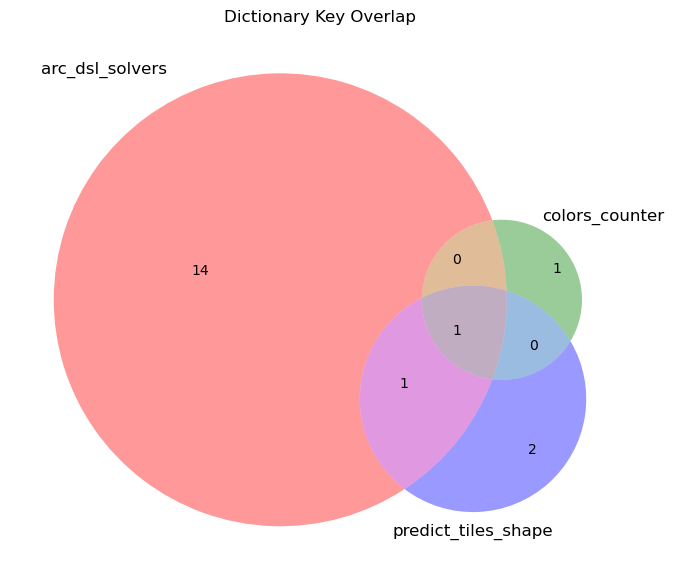

Unique keys in Dict1: 9
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 2
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict3: 9
Total keys in Dict3: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Common keys among all: 1


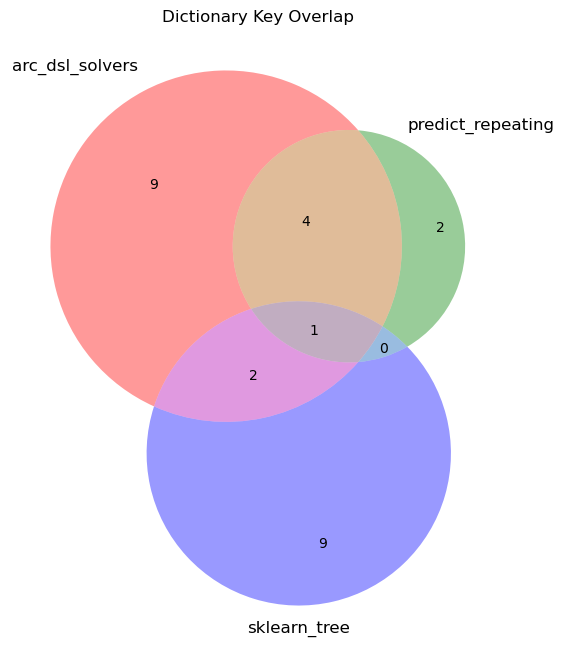

Unique keys in Dict1: 11
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 0
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict3: 4
Total keys in Dict3: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Common keys among all: 5


/home/hyunseok/anaconda3/envs/enssamble/lib/python3.9/site-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


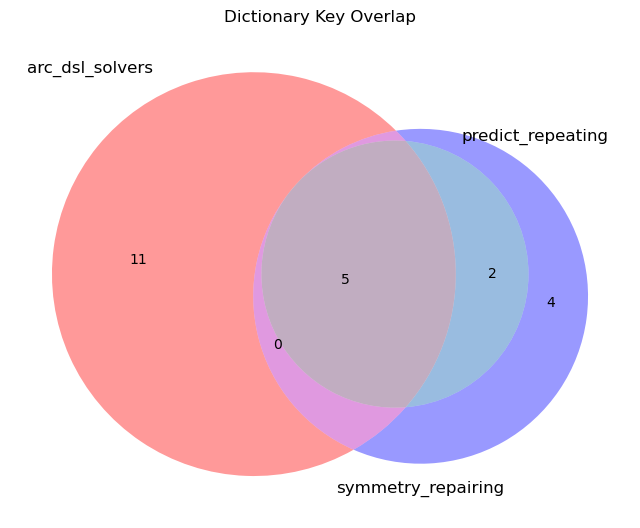

Unique keys in Dict1: 11
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 2
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict3: 2
Total keys in Dict3: {'solver_name', '68b67ca3', '7039b2d7'}
Common keys among all: 1


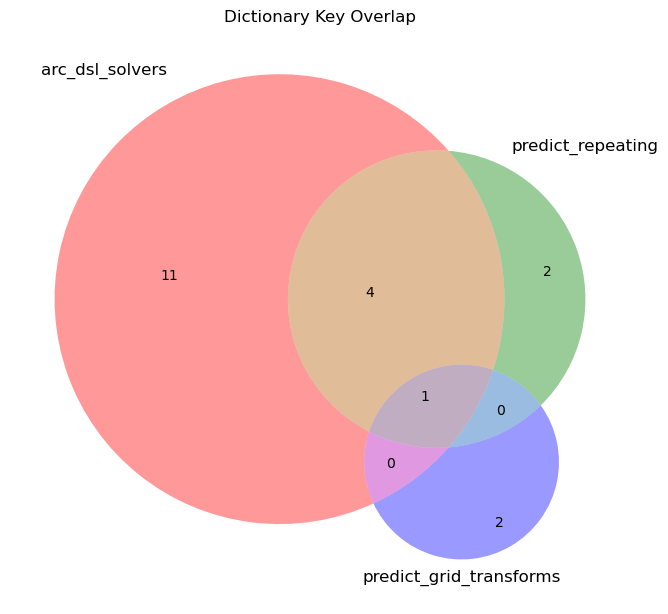

Unique keys in Dict1: 11
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 1
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict3: 1
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 2


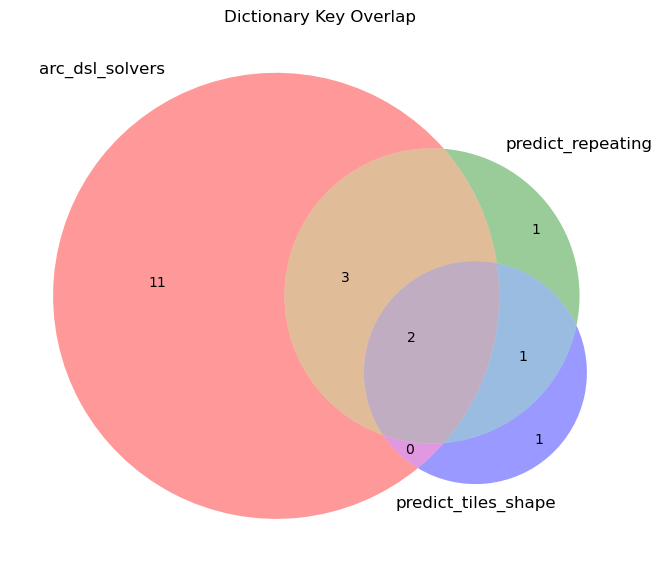

Unique keys in Dict1: 9
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 9
Total keys in Dict2: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Unique keys in Dict3: 6
Total keys in Dict3: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Common keys among all: 1


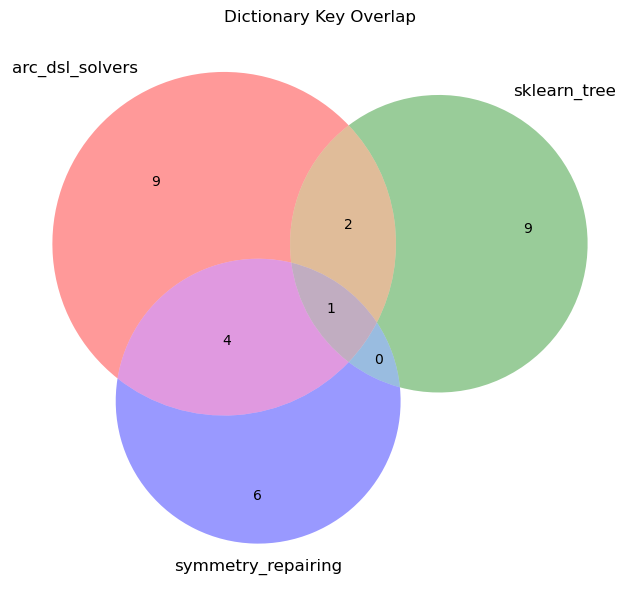

Unique keys in Dict1: 13
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 9
Total keys in Dict2: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Unique keys in Dict3: 2
Total keys in Dict3: {'solver_name', '68b67ca3', '7039b2d7'}
Common keys among all: 1


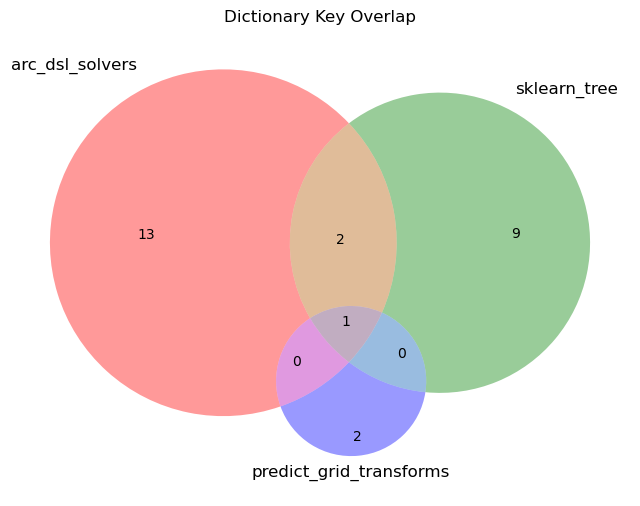

Unique keys in Dict1: 12
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 9
Total keys in Dict2: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Unique keys in Dict3: 2
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 1


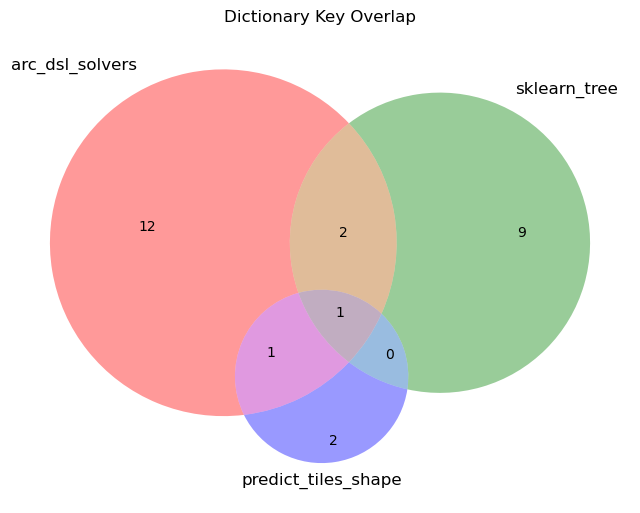

Unique keys in Dict1: 11
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 6
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Unique keys in Dict3: 2
Total keys in Dict3: {'solver_name', '68b67ca3', '7039b2d7'}
Common keys among all: 1


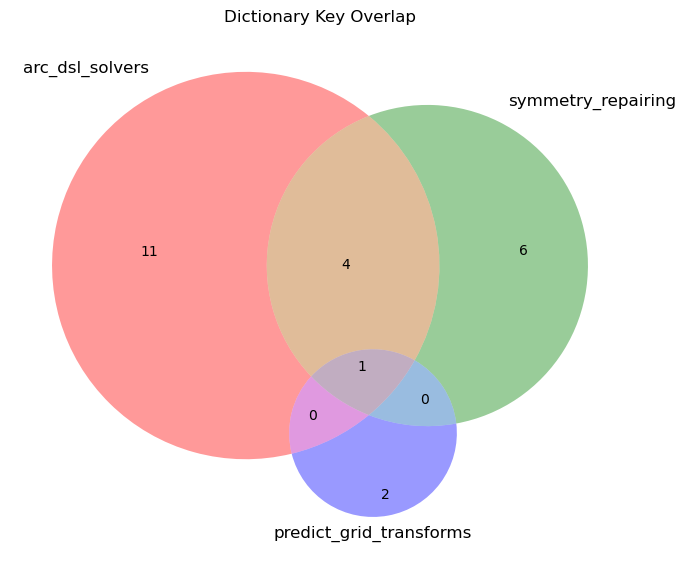

Unique keys in Dict1: 11
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 5
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Unique keys in Dict3: 1
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 2


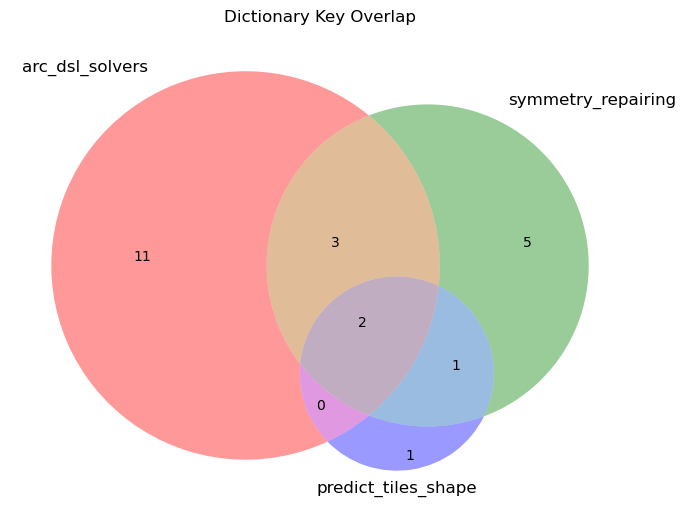

Unique keys in Dict1: 14
Total keys in Dict1: {'d56f2372', '60c09cac', 'ca8f78db', '27f8ce4f', 'ea9794b1', 'c7d4e6ad', '1d0a4b61', 'cd3c21df', 'solver_name', '070dd51e', 'f4081712', '73182012', 'e95e3d8e', 'c663677b', '9ddd00f0', '67b4a34d'}
Unique keys in Dict2: 2
Total keys in Dict2: {'solver_name', '68b67ca3', '7039b2d7'}
Unique keys in Dict3: 2
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 1


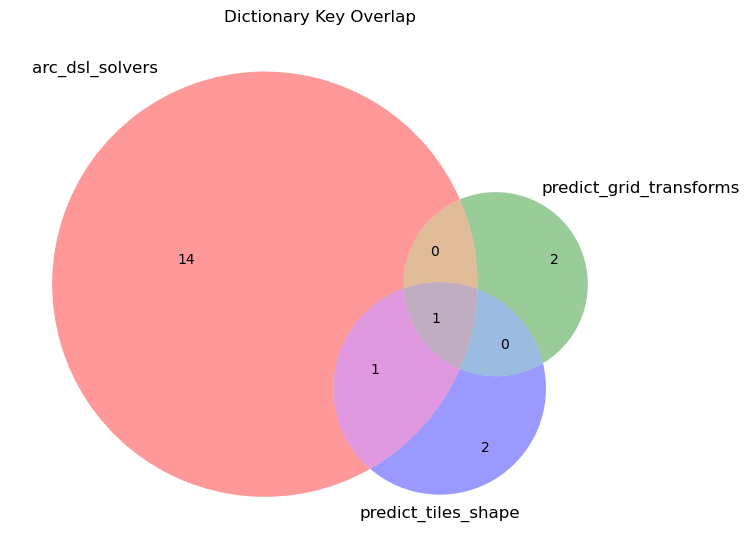

Unique keys in Dict1: 126
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

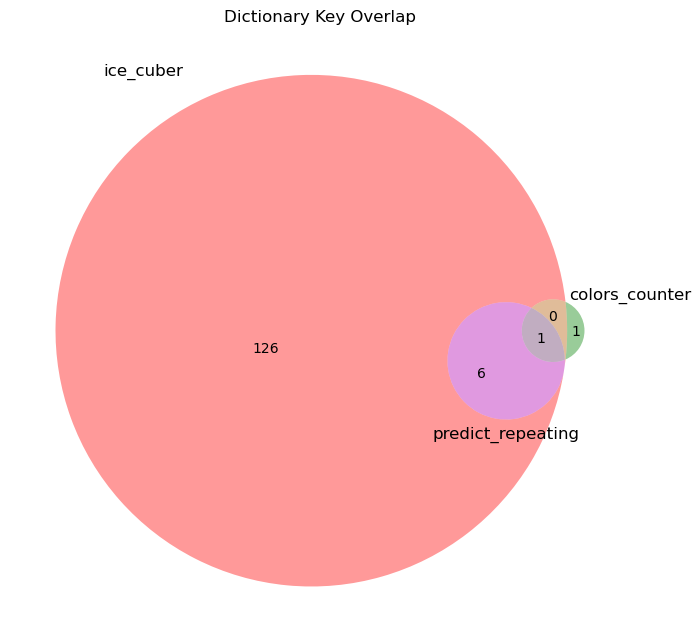

Unique keys in Dict1: 125
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

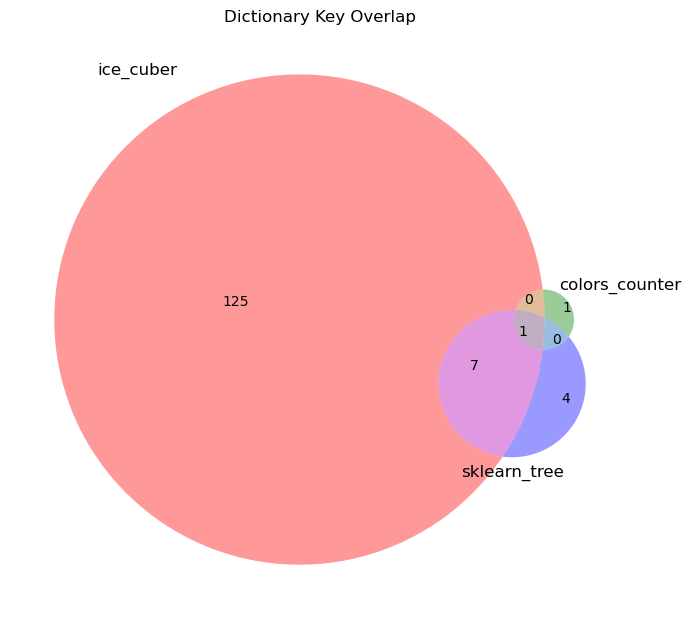

Unique keys in Dict1: 122
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

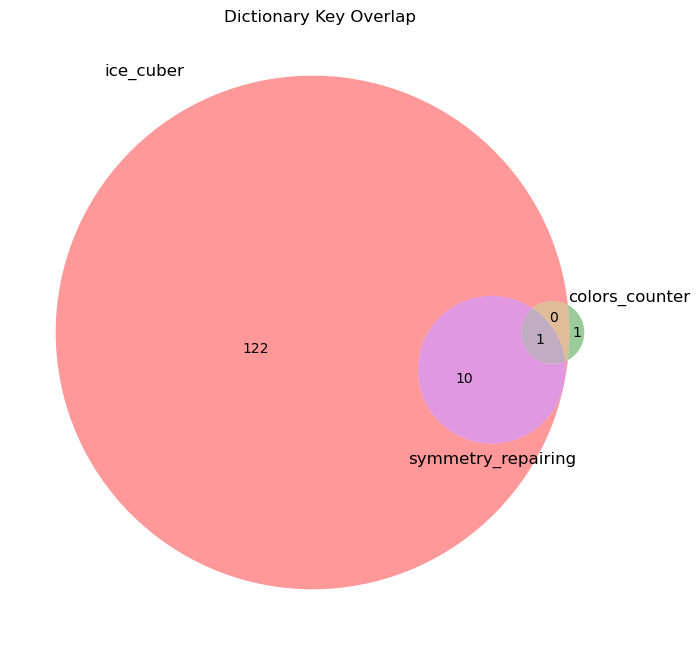

Unique keys in Dict1: 130
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

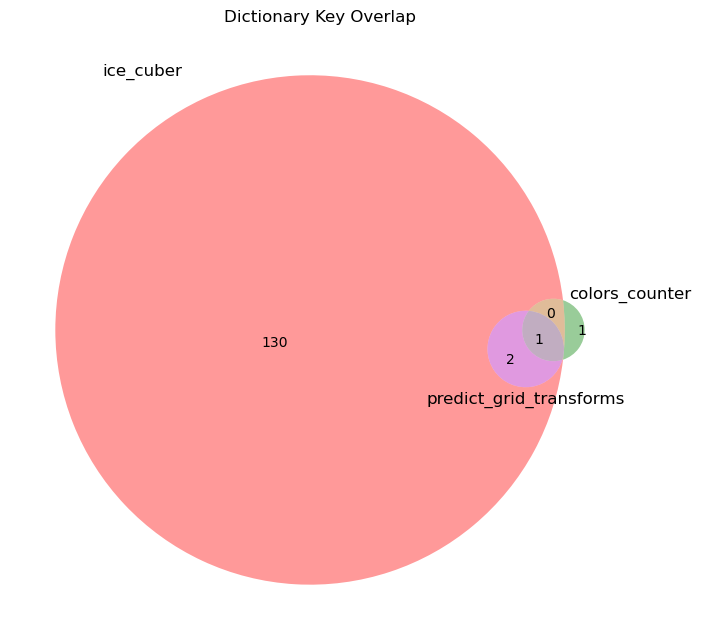

Unique keys in Dict1: 129
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

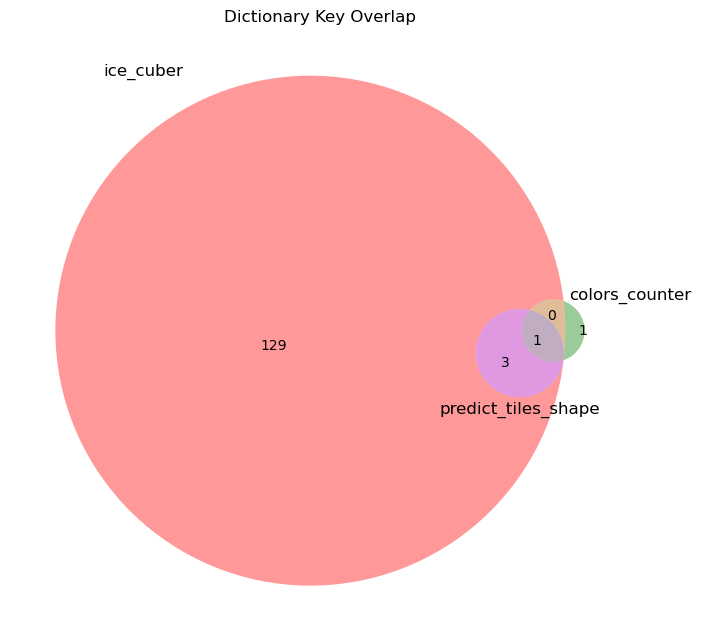

Unique keys in Dict1: 119
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

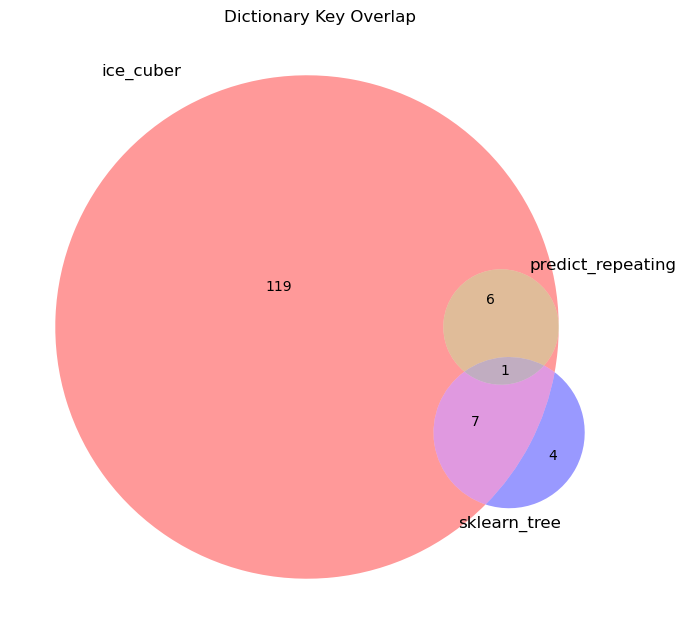

Unique keys in Dict1: 122
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

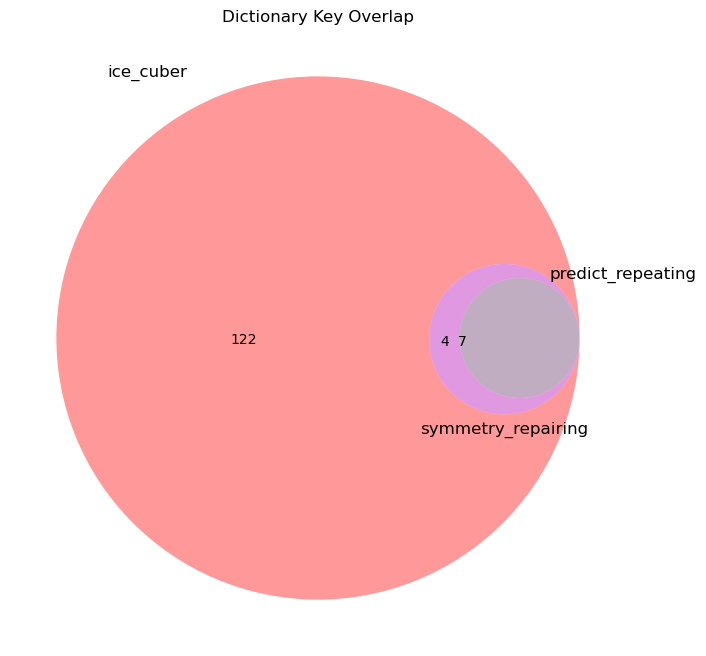

Unique keys in Dict1: 124
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

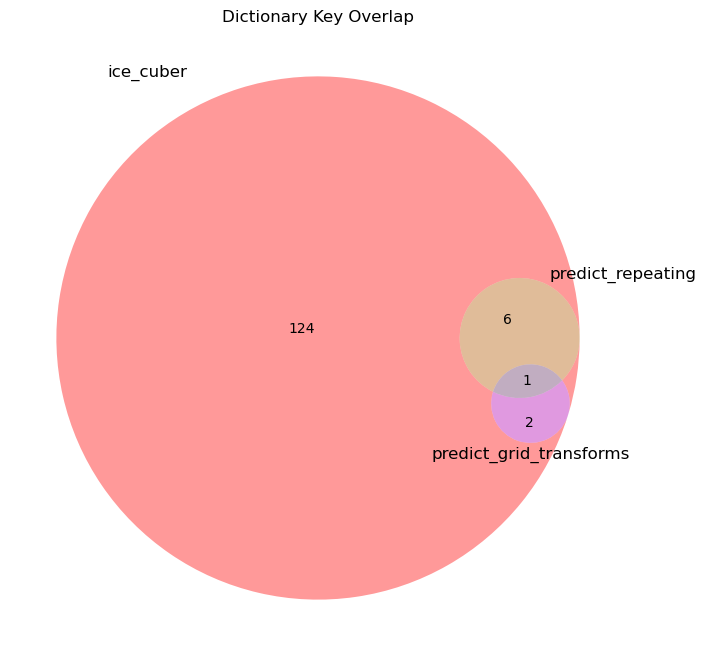

Unique keys in Dict1: 125
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

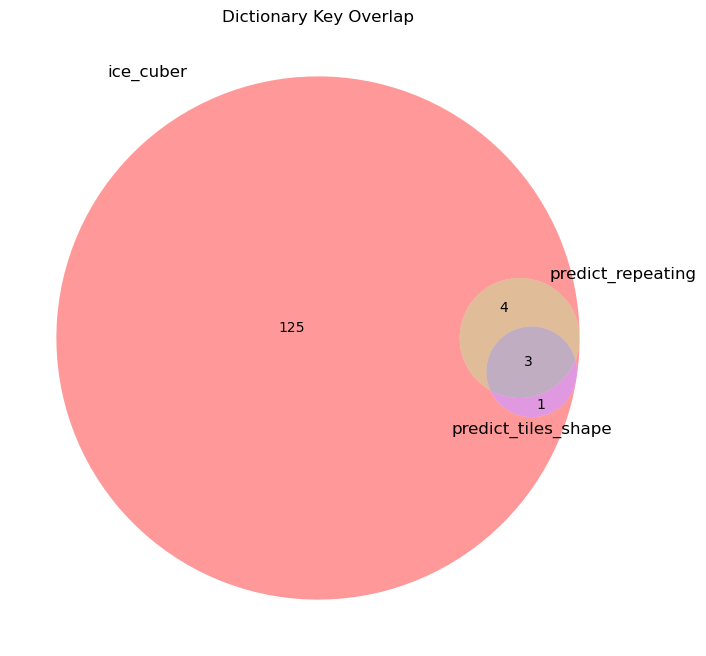

Unique keys in Dict1: 115
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

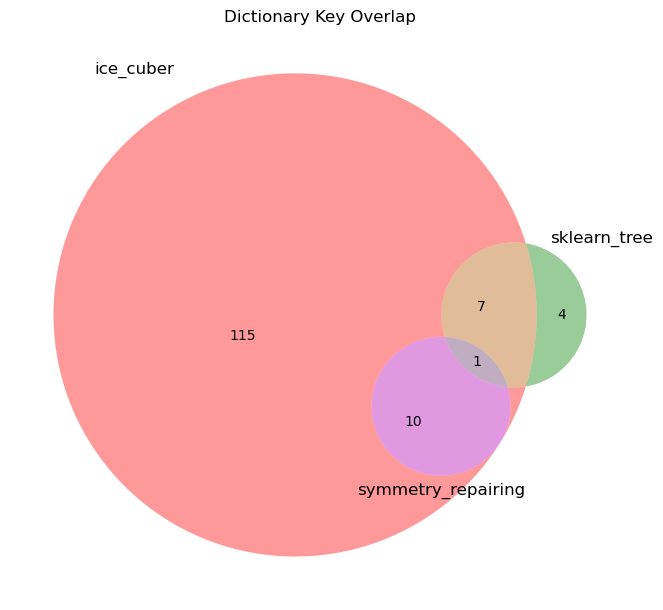

Unique keys in Dict1: 123
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

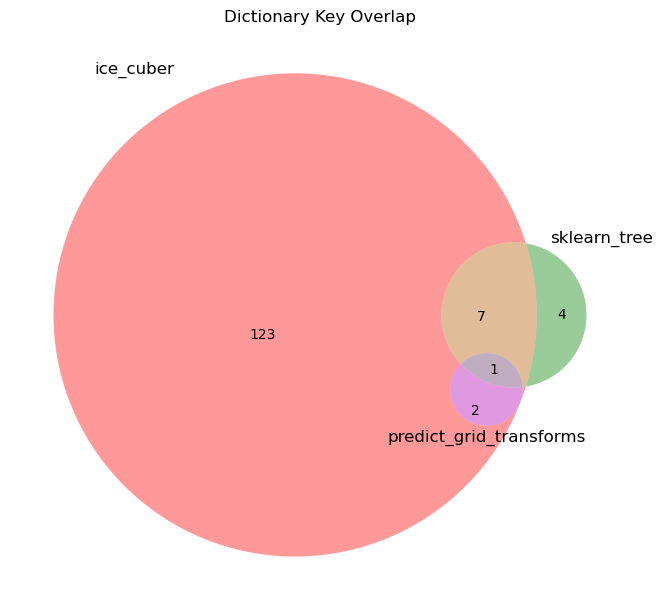

Unique keys in Dict1: 122
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

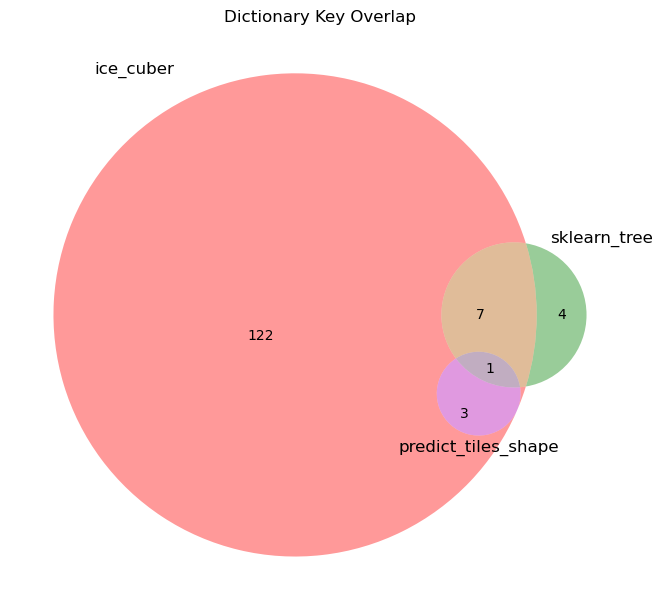

Unique keys in Dict1: 120
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

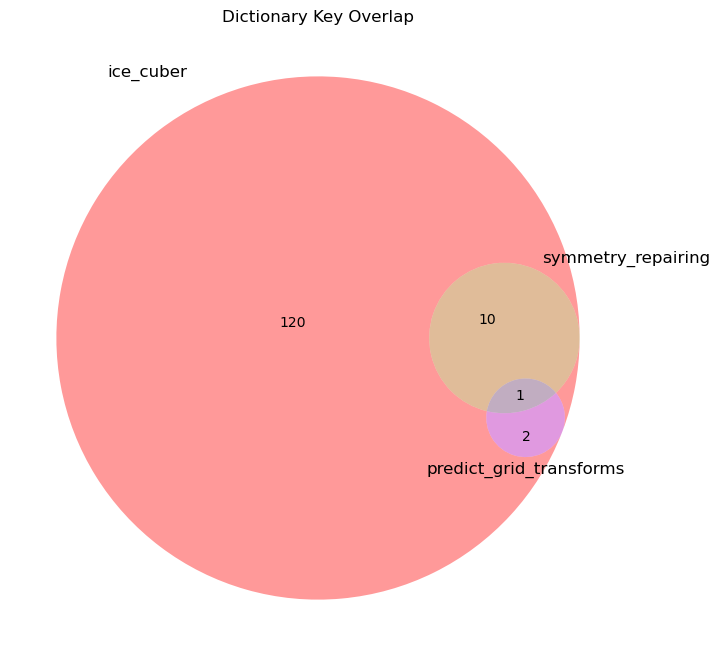

Unique keys in Dict1: 121
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

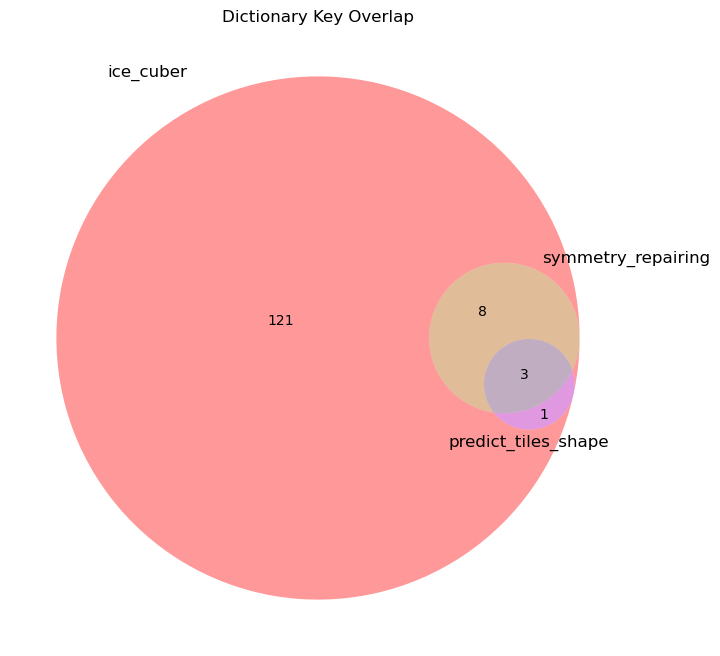

Unique keys in Dict1: 127
Total keys in Dict1: {'fc754716', '8ee62060', '21f83797', '45bbe264', '94414823', 'd4b1c2b1', '5b6cbef5', '0c9aba6e', '5b526a93', 'b7f8a4d8', '3979b1a8', '0692e18c', 'c3202e5a', '84db8fc4', '7ee1c6ea', '67636eac', 'e9c9d9a1', '2072aba6', 'ae58858e', 'ba9d41b8', 'f0df5ff0', '7039b2d7', 'a406ac07', '48f8583b', 'f0afb749', '32e9702f', '140c817e', '66e6c45b', 'aa4ec2a5', '27a77e38', '93c31fbe', 'b4a43f3b', 'e57337a4', 'e133d23d', 'c8b7cc0f', '8e2edd66', '782b5218', 'ccd554ac', '642d658d', '770cc55f', '68b67ca3', '137f0df0', 'be03b35f', '1d0a4b61', 'c7d4e6ad', 'af22c60d', '73182012', 'c663677b', 'e41c6fd3', '695367ec', 'e7639916', '833dafe3', 'e0fb7511', 'e69241bd', 'b1fc8b8e', '2546ccf6', '20818e16', '070dd51e', '1a6449f1', '358ba94e', 'ad7e01d0', '66f2d22f', '0f63c0b9', 'af24b4cc', '929ab4e9', '60a26a3e', 'aa18de87', '2753e76c', '34b99a2b', '3d31c5b3', 'cd3c21df', '7953d61e', '0c786b71', 'e7dd8335', '50a16a69', '9a4bb226', 'ce8d95cc', 'ca8f78db', 'a59b95c0', '4cd

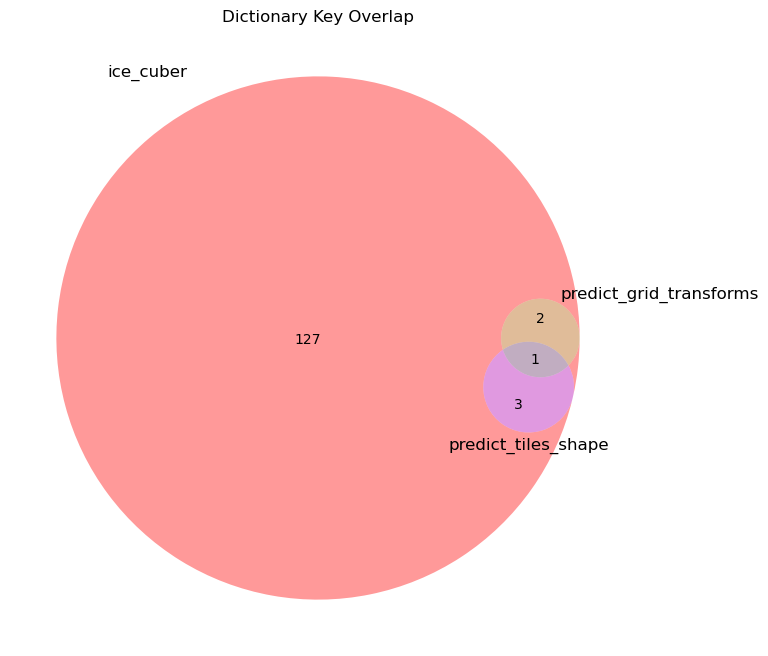

Unique keys in Dict1: 1
Total keys in Dict1: {'solver_name', '332efdb3'}
Unique keys in Dict2: 6
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict3: 11
Total keys in Dict3: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Common keys among all: 1


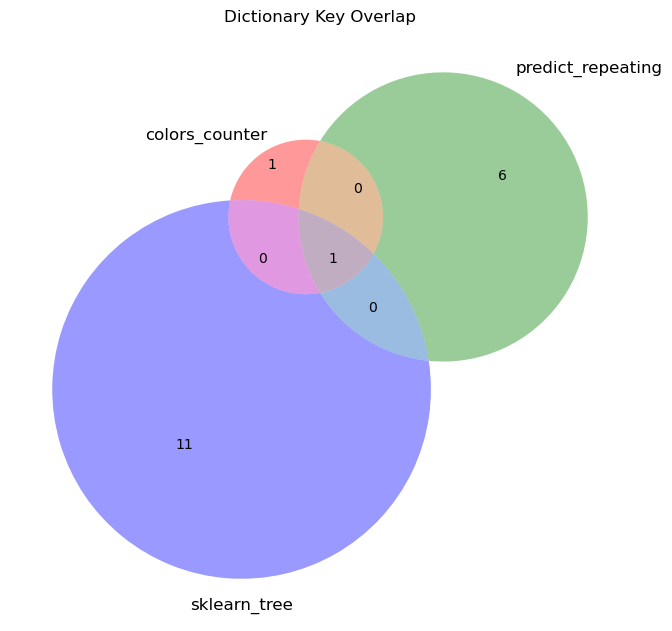

Unique keys in Dict1: 1
Total keys in Dict1: {'solver_name', '332efdb3'}
Unique keys in Dict2: 0
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict3: 4
Total keys in Dict3: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Common keys among all: 1


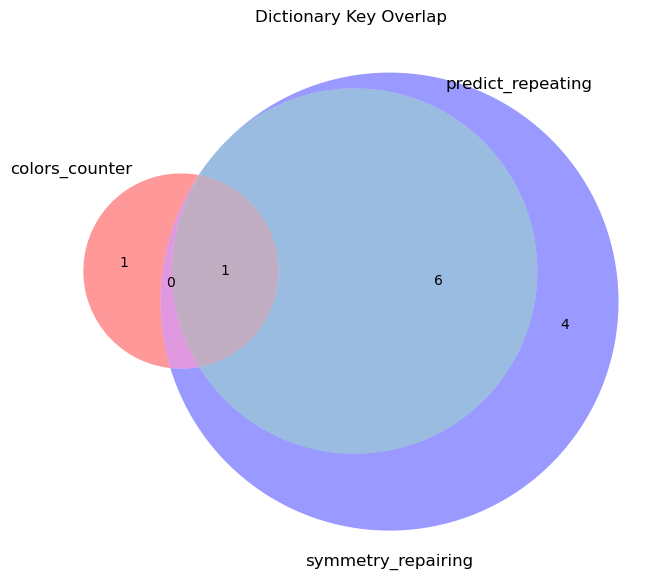

Unique keys in Dict1: 1
Total keys in Dict1: {'solver_name', '332efdb3'}
Unique keys in Dict2: 6
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict3: 2
Total keys in Dict3: {'solver_name', '68b67ca3', '7039b2d7'}
Common keys among all: 1


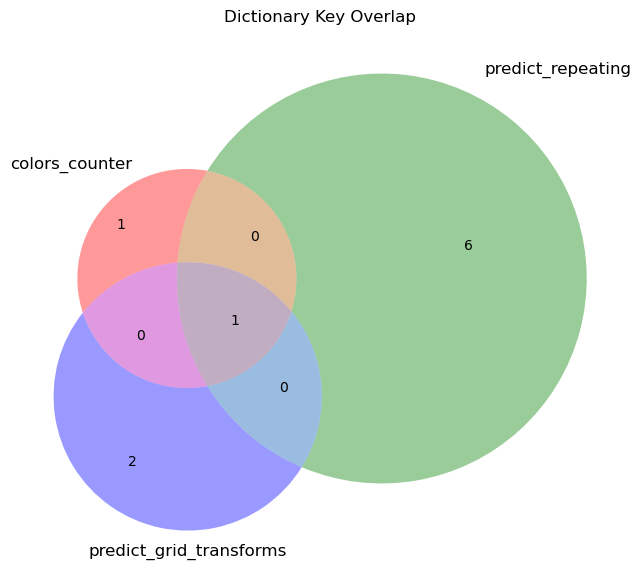

Unique keys in Dict1: 1
Total keys in Dict1: {'solver_name', '332efdb3'}
Unique keys in Dict2: 4
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict3: 1
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 1


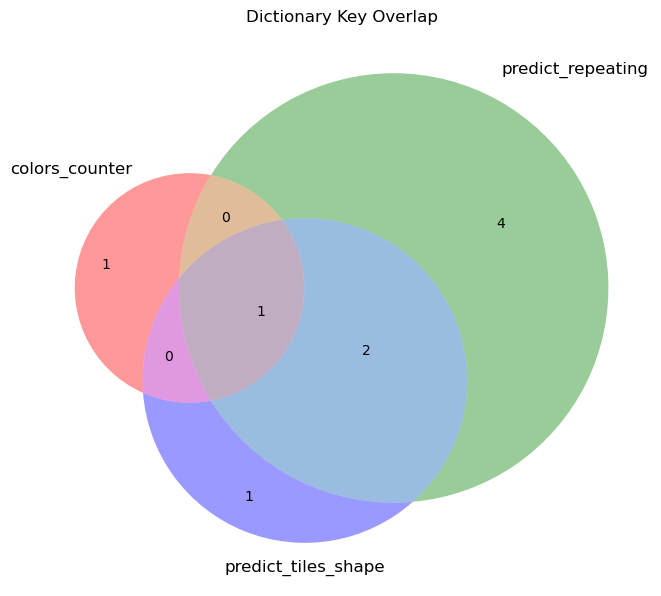

Unique keys in Dict1: 1
Total keys in Dict1: {'solver_name', '332efdb3'}
Unique keys in Dict2: 11
Total keys in Dict2: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Unique keys in Dict3: 10
Total keys in Dict3: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Common keys among all: 1


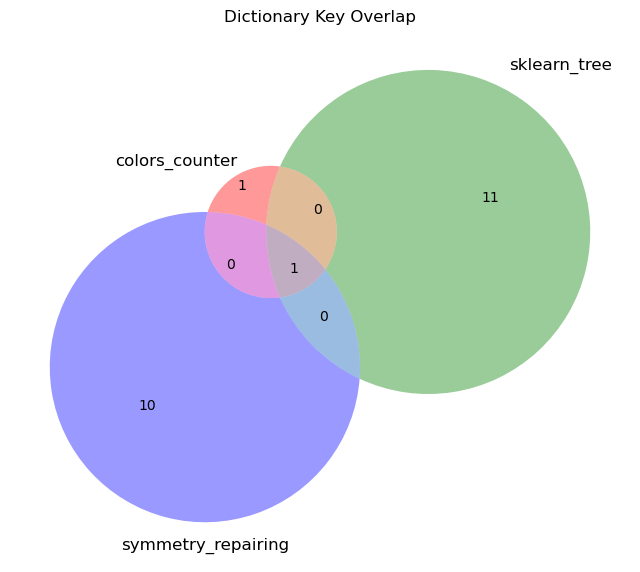

Unique keys in Dict1: 1
Total keys in Dict1: {'solver_name', '332efdb3'}
Unique keys in Dict2: 11
Total keys in Dict2: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Unique keys in Dict3: 2
Total keys in Dict3: {'solver_name', '68b67ca3', '7039b2d7'}
Common keys among all: 1


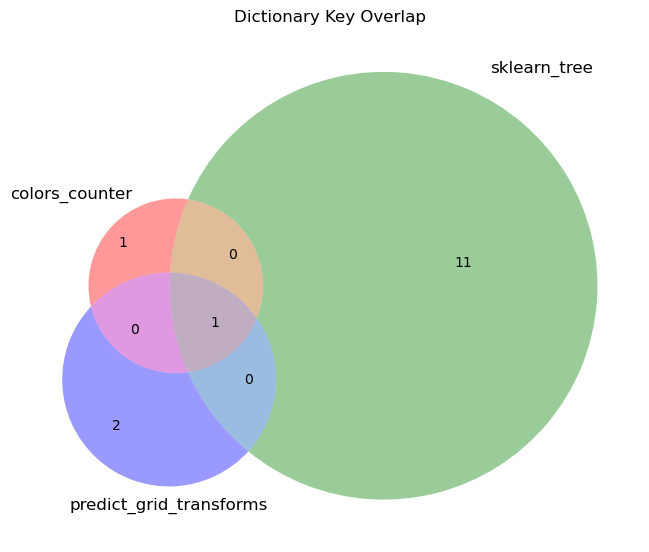

Unique keys in Dict1: 1
Total keys in Dict1: {'solver_name', '332efdb3'}
Unique keys in Dict2: 11
Total keys in Dict2: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Unique keys in Dict3: 3
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 1


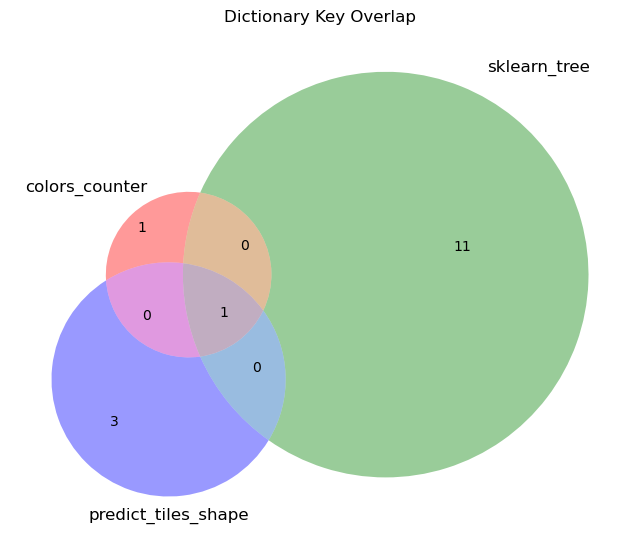

Unique keys in Dict1: 1
Total keys in Dict1: {'solver_name', '332efdb3'}
Unique keys in Dict2: 10
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Unique keys in Dict3: 2
Total keys in Dict3: {'solver_name', '68b67ca3', '7039b2d7'}
Common keys among all: 1


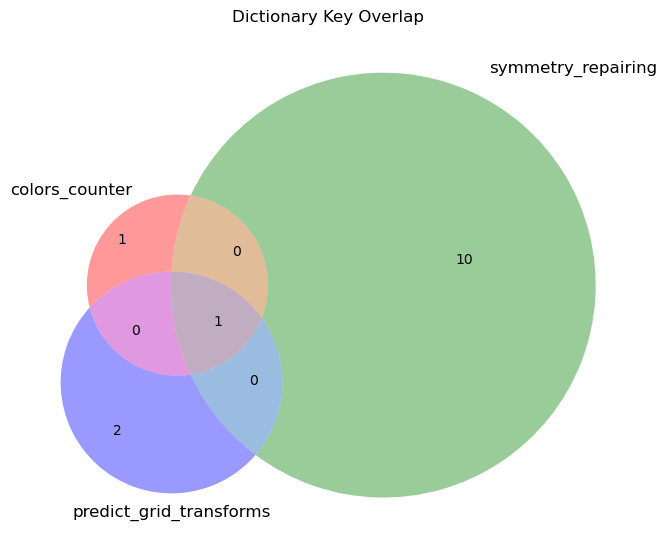

Unique keys in Dict1: 1
Total keys in Dict1: {'solver_name', '332efdb3'}
Unique keys in Dict2: 8
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Unique keys in Dict3: 1
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 1


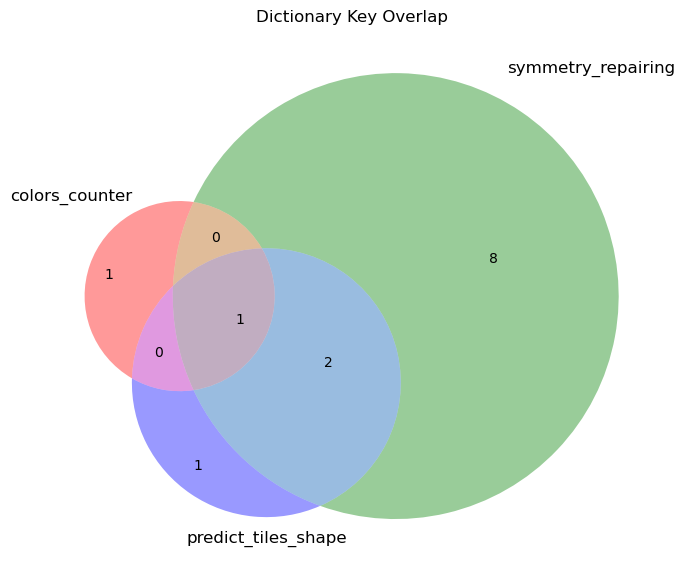

Unique keys in Dict1: 1
Total keys in Dict1: {'solver_name', '332efdb3'}
Unique keys in Dict2: 2
Total keys in Dict2: {'solver_name', '68b67ca3', '7039b2d7'}
Unique keys in Dict3: 3
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 1


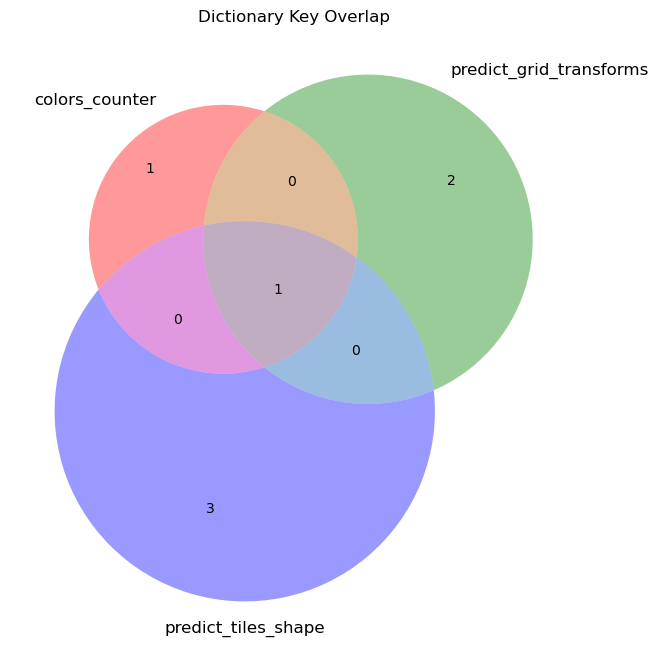

Unique keys in Dict1: 0
Total keys in Dict1: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict2: 11
Total keys in Dict2: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Unique keys in Dict3: 4
Total keys in Dict3: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Common keys among all: 1


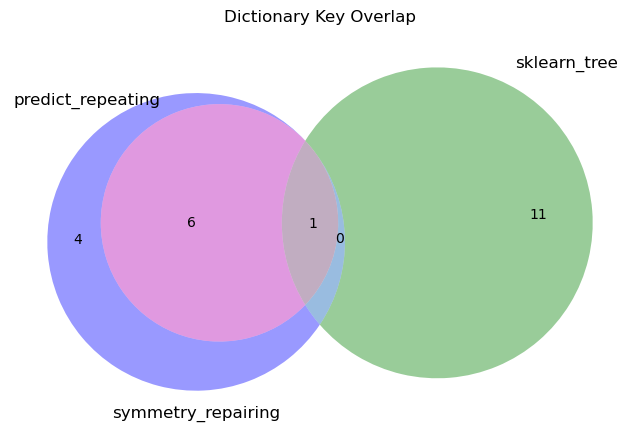

Unique keys in Dict1: 6
Total keys in Dict1: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict2: 11
Total keys in Dict2: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Unique keys in Dict3: 2
Total keys in Dict3: {'solver_name', '68b67ca3', '7039b2d7'}
Common keys among all: 1


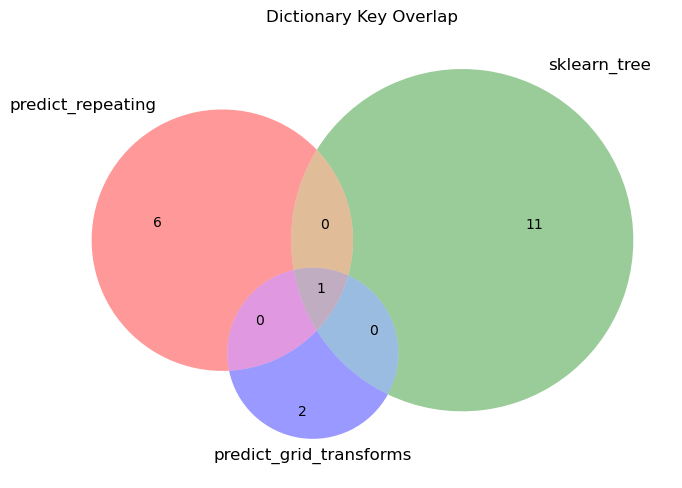

Unique keys in Dict1: 4
Total keys in Dict1: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict2: 11
Total keys in Dict2: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Unique keys in Dict3: 1
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 1


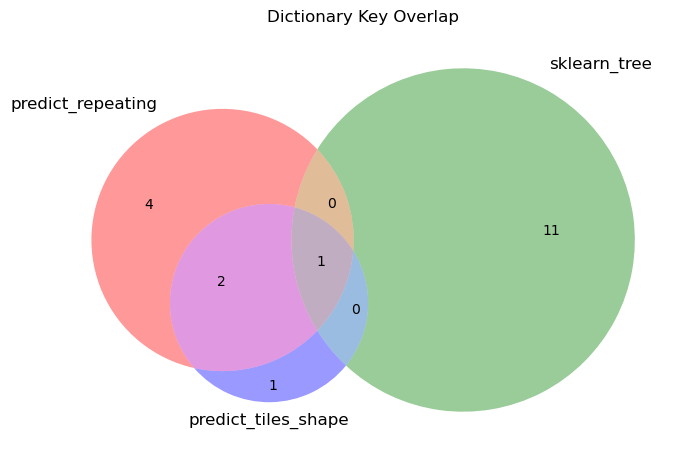

Unique keys in Dict1: 0
Total keys in Dict1: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict2: 4
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Unique keys in Dict3: 2
Total keys in Dict3: {'solver_name', '68b67ca3', '7039b2d7'}
Common keys among all: 1


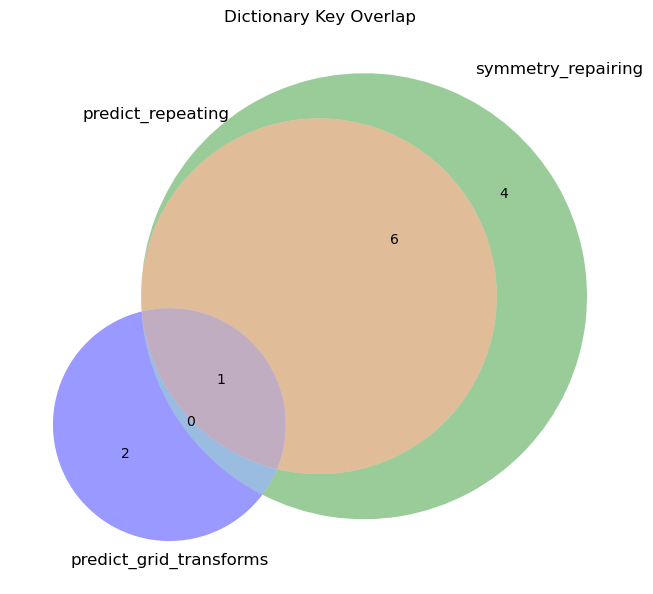

Unique keys in Dict1: 0
Total keys in Dict1: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict2: 4
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Unique keys in Dict3: 1
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 3


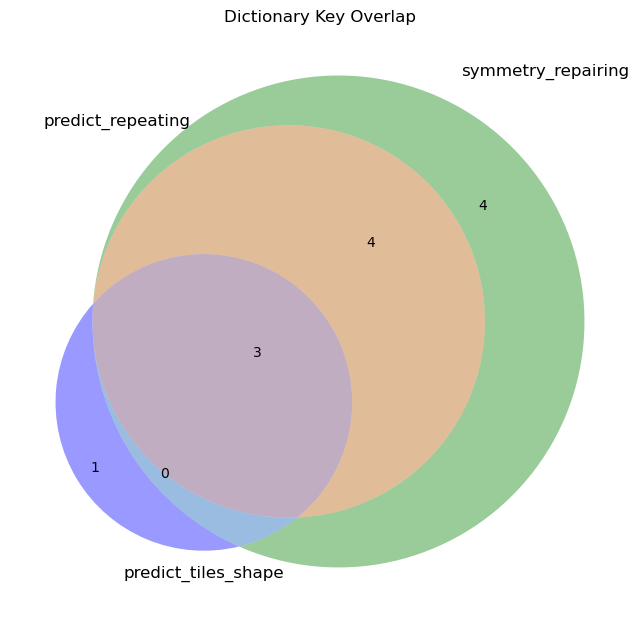

Unique keys in Dict1: 4
Total keys in Dict1: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'e95e3d8e', 'c663677b', 'f823c43c'}
Unique keys in Dict2: 2
Total keys in Dict2: {'solver_name', '68b67ca3', '7039b2d7'}
Unique keys in Dict3: 1
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 1


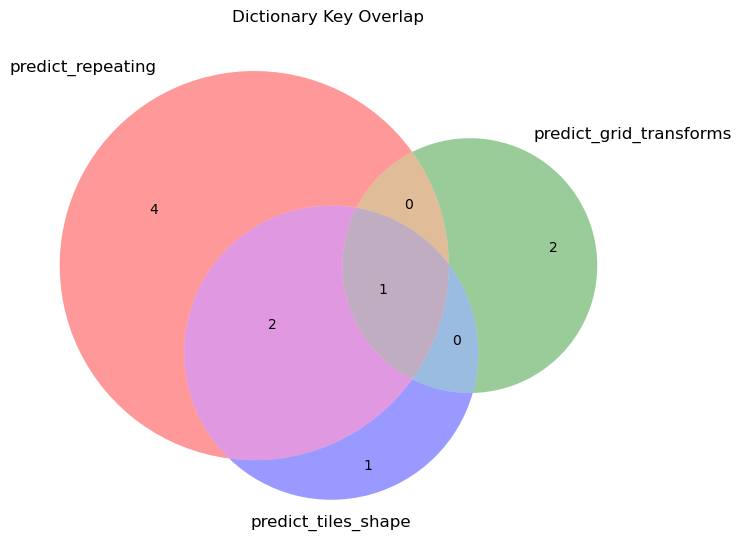

Unique keys in Dict1: 11
Total keys in Dict1: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Unique keys in Dict2: 10
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Unique keys in Dict3: 2
Total keys in Dict3: {'solver_name', '68b67ca3', '7039b2d7'}
Common keys among all: 1


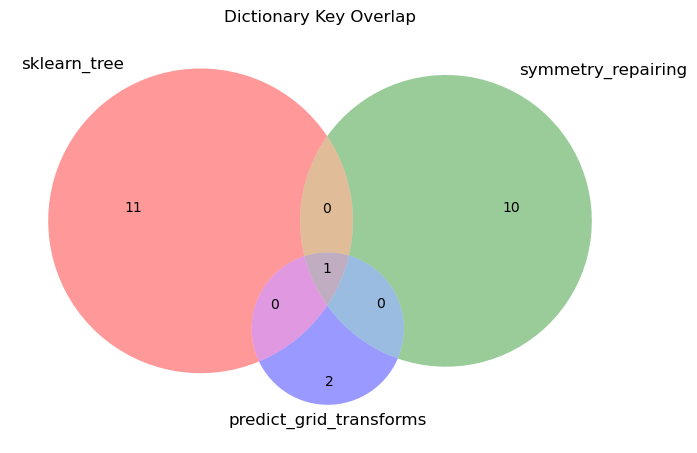

Unique keys in Dict1: 11
Total keys in Dict1: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Unique keys in Dict2: 8
Total keys in Dict2: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Unique keys in Dict3: 1
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 1


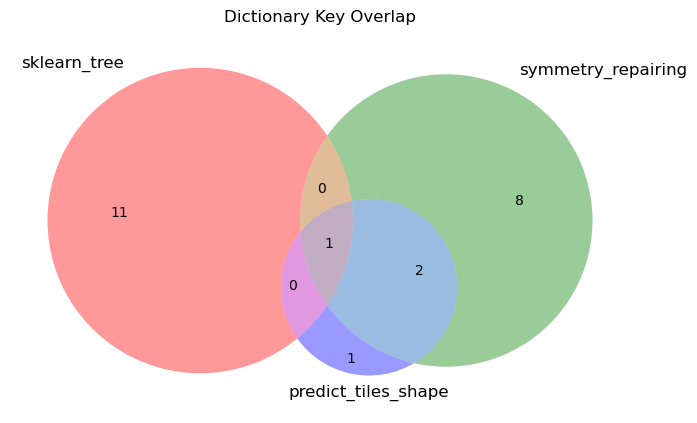

Unique keys in Dict1: 11
Total keys in Dict1: {'c3202e5a', 'bf699163', '1a2e2828', 'solver_name', '73ccf9c2', 'cd3c21df', '1a6449f1', '358ba94e', '9a4bb226', 'd56f2372', '3194b014', 'f5aa3634'}
Unique keys in Dict2: 2
Total keys in Dict2: {'solver_name', '68b67ca3', '7039b2d7'}
Unique keys in Dict3: 3
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 1


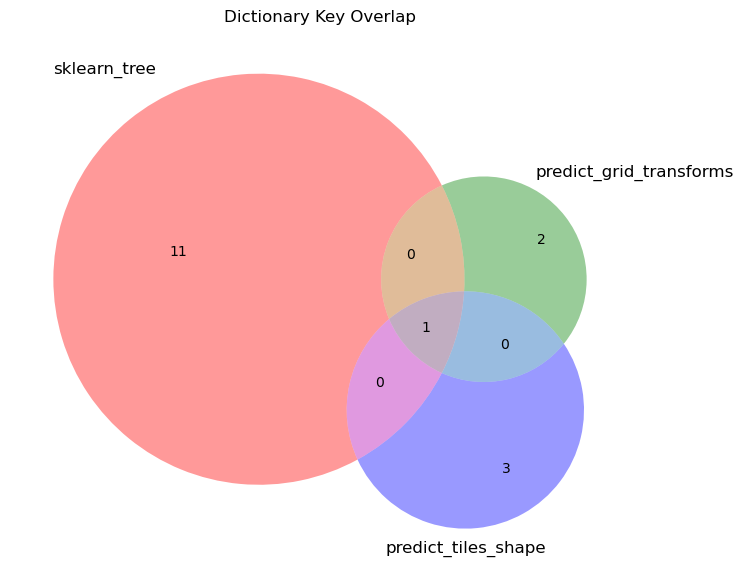

Unique keys in Dict1: 8
Total keys in Dict1: {'ca8f78db', 'ea959feb', '1d0a4b61', 'solver_name', 'af22c60d', 'e95e3d8e', '903d1b4a', 'c663677b', '47996f11', '981571dc', 'f823c43c'}
Unique keys in Dict2: 2
Total keys in Dict2: {'solver_name', '68b67ca3', '7039b2d7'}
Unique keys in Dict3: 1
Total keys in Dict3: {'50a16a69', 'c663677b', 'solver_name', 'f823c43c'}
Common keys among all: 1


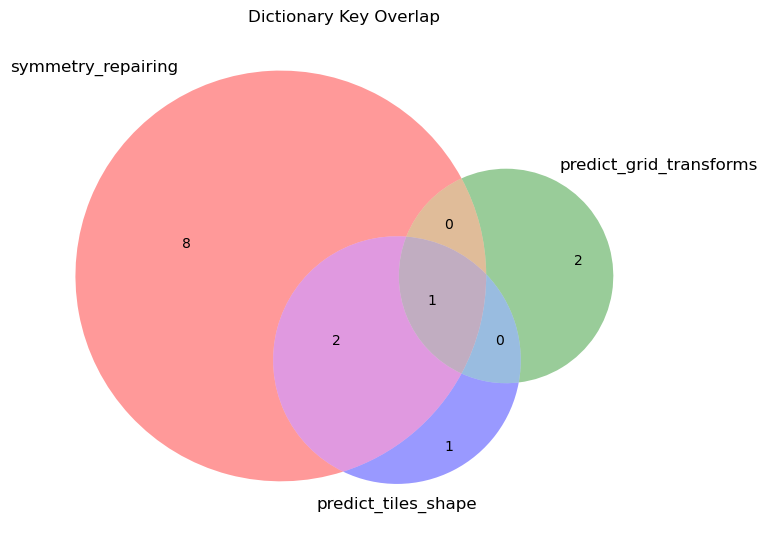

In [13]:
from itertools import combinations

def generate_combinations(items, r):
    """
    주어진 리스트 items에서 r개씩 뽑는 모든 조합을 반환하는 함수.
    """
    return list(combinations(items, r))
# venn, suc_venn, fail_venn
 
# 예제 사용법
items = [ {"solver_name":e['metadata']['solver_name'], **e['submission']} for e in suc_venn]
r = 3
all_combinations = generate_combinations(items, r)

print(f"{len(all_combinations)}개의 조합이 있습니다:")
for combo in  all_combinations:
    visualize_set_overlap(combo)


evaluation data is set
4


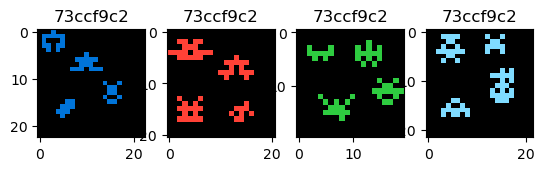

3


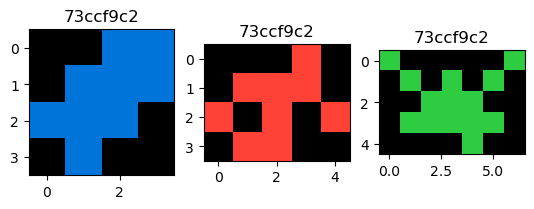

4


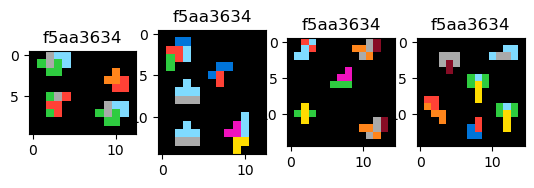

3


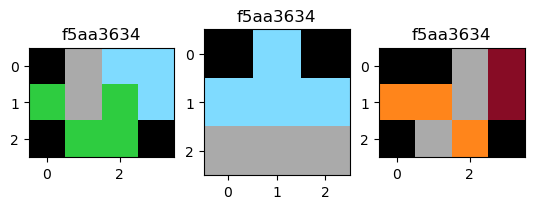

3


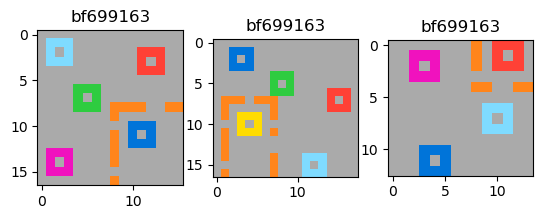

2


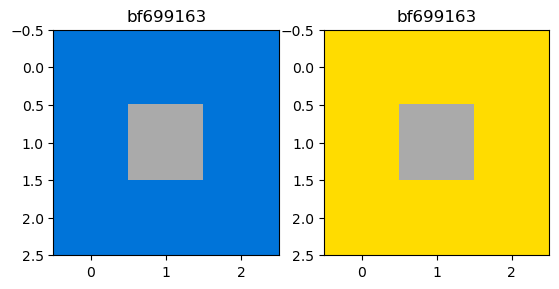

In [ ]:
# 즉 골라내거나 선발하거나하는 걸 잘함. 즉 임의의 예측치가 있는 오브젝트 선별 과정을 잘함 
data.cur_data_mode(data_mode)
plotter.check_type(data.cur_problem["73ccf9c2"], "73ccf9c2")
plotter.check_type(data.cur_problem['f5aa3634'], 'f5aa3634')
plotter.check_type(data.cur_problem['bf699163'], 'bf699163')


In [ ]:
import itertools
import json

# List of dictionaries to combine
dictionaries = venn
# Extract only submissions for permutation
submissions = [d["submission"] for d in dictionaries]
solver_names = [d["metadata"]["solver_name"] for d in dictionaries]

# Generate all permutations of the submissions and integrate with ensemble sequence
ensemble_results = []
for perm in itertools.permutations(range(len(submissions))):
    combined_submission = {}
    ensemble_sequence = [solver_names[i] for i in perm]
    
    for index in perm:
        for key, value in submissions[index].items():
            combined_submission.setdefault(key, []).append(value)
    
    ensemble_results.append({
        "ensemble_sequence": ensemble_sequence,
        "combined_submission": combined_submission
    })

# Display one of the ensemble results
print(json.dumps(ensemble_results, indent=2))
ensemble_results

: 

In [ ]:
Total keys in Dict1: {'070dd51e', '73182012', 'solver_name', 'c663677b', 'cd3c21df', '1d0a4b61', 'ea9794b1', '67b4a34d', 'c7d4e6ad', '60c09cac', 'ca8f78db', 'f4081712', 'd56f2372', '27f8ce4f', 'e95e3d8e', '9ddd00f0'}
Unique keys in Dict2: 115
Total keys in Dict2: {'ccd554ac', 'aa18de87', '903d1b4a', 'b4a43f3b', '50aad11f', '0f63c0b9', 'ef26cbf6', 'af22c60d', '7d1f7ee8', '32e9702f', '7c9b52a0', '8e2edd66', '1d0a4b61', 'd492a647', '93c31fbe', '981571dc', 'fc754716', '833dafe3', 'aa4ec2a5', 'fb791726', '19bb5feb', '3d31c5b3', 'ed98d772', '12eac192', '319f2597', '60a26a3e', '0bb8deee', '917bccba', 'bc4146bd', '2546ccf6', 'e1baa8a4', 'd4b1c2b1', 'ca8de6ea', 'e633a9e5', '642d658d', '54db823b', '27a77e38', '48131b3c', '66f2d22f', '0692e18c', '59341089', '84db8fc4', '94414823', 'e7a25a18', 'e57337a4', '4aab4007', 'e95e3d8e', 'ae58858e', '0c786b71', 'ea9794b1', 'c35c1b4c', 'c7d4e6ad', 'af24b4cc', '34b99a2b', 'a406ac07', '68b67ca3', 'bf32578f', '67636eac', '8ee62060', '358ba94e', '73182012', 'e0fb7511', 'ce8d95cc', '27f8ce4f', '639f5a19', 'e41c6fd3', '21f83797', 'b1fc8b8e', 'b7f8a4d8', 'c8b7cc0f', '66e6c45b', '140c817e', '770cc55f', 'e9c9d9a1', '8a371977', 'e7dd8335', 'e133d23d', '1a6449f1', '7039b2d7', '782b5218', '8ba14f53', '60c09cac', '50a16a69', 'be03b35f', '47996f11', '4cd1b7b2', '45bbe264', '20818e16', 'ad7e01d0', 'f823c43c', '3194b014', '1c0d0a4b', '516b51b7', 'f0df5ff0', '695367ec', 'ca8f78db', '48f8583b', 'solver_name', 'a59b95c0', 'ce039d91', 'f0afb749', 'c48954c1', 'cf133acc', '5ffb2104', '4f537728', '3979b1a8', '929ab4e9', '1c02dbbe', '7953d61e', 'e69241bd', '81c0276b', 'cd3c21df', '5b6cbef5', '070dd51e', '137f0df0', 'ea959feb', 'a680ac02', '9a4bb226', 'ba9d41b8', '1a2e2828', 'a8610ef7', 'c663677b', 'c3202e5a', '7ee1c6ea', '5b526a93', 'e7639916', '2072aba6', '7bb29440', '18419cfa', '2753e76c', '5a5a2103', '9c1e755f', '0c9aba6e'}
Unique keys in Dict3: 3
Total keys in Dict3: {'3194b014', '1a6449f1', '358ba94e', 'solver_name', 'cd3c21df', '73ccf9c2', '9a4bb226', 'bf699163', 'c3202e5a', 'd56f2372', 'f5aa3634', '1a2e2828'}

NameError: name 'ensemble_results' is not defined